In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font color='red'><b>Amazon</b>, is an American multinational technology company, engaged in e-commerce, cloud computing, online advertising, digital streaming, and artificial intelligence. Here we will analyse a sample e-commerce data of Amazon for the year 2010 to 2017.

In [210]:
df= pd.read_csv('Amazon Sales data.csv')
df.shape
print(f'The Dataset "DF" contains {df.shape[0]} Rows and {df.shape[1]} Columns.')

The Dataset "DF" contains 100 Rows and 14 Columns.


<font color='red'>
The Dataset "DF" contains the following columns:

<b>Region:</b> The region where the sale was made.<br>
<b>Country:</b> The country where the sale was made.<br>
<b>Item Type:</b> The type of item sold.<br>
<b>Sales Channel:</b> The sales channel (Online/Offline).<br>
<b>Order Priority:</b> The priority of the order.<br>
<b>Order Date:</b> The date when the order was placed.<br>
<b>Order ID:</b> The unique identifier for the order.<br>
<b>Ship Date:</b> The date when the order was shipped.<br>
<b>Units Sold:</b> The number of units sold.<br>
<b>Unit Price:</b> The price per unit of the item.<br>
<b>Unit Cost:</b> The cost per unit of the item.<br>
<b>Total Revenue:</b> The total revenue from the sale.<br>
<b>Total Cost:</b> The total cost of the sale.<br>
<b>Total Profit:</b> The total profit from the sale.<br>

# 1) Data Cleaning
### Check for Null values.

In [205]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

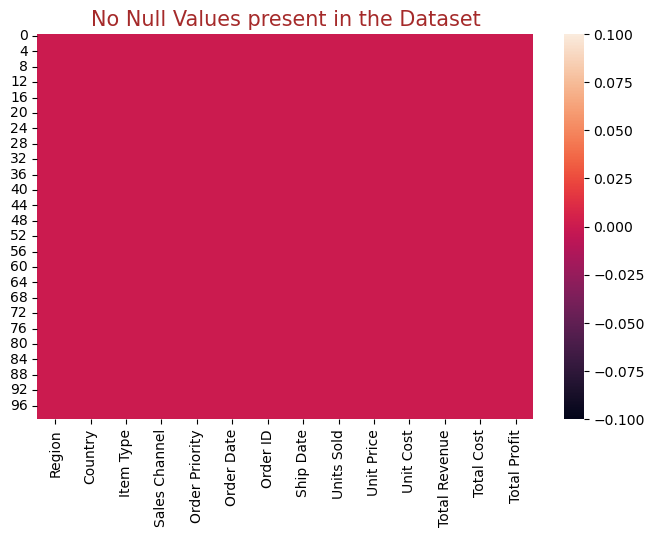

In [206]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())
plt.title('No Null Values present in the Dataset', fontsize=15, color='Brown')
plt.show()

### Checking Duplicates|

In [207]:
df.duplicated().sum()

0

In [208]:
df['Order ID'].duplicated().sum()

0

<font color='maroon'>There are No Duplicate Rows in the Dataset DF

### Verifying Data types and converting if necessary.

In [152]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

### Parse Dates for Order Date and Ship Date.

In [153]:
df['Order Date']= pd.to_datetime(df['Order Date'])

In [154]:
df['Order Year']= df['Order Date'].dt.year
df['Order Month']= df['Order Date'].dt.month

In [155]:
df['Ship Date']= pd.to_datetime(df['Ship Date'])

In [156]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
Order Year                 int64
Order Month                int64
dtype: object

# 2) Descriptive Analysis
### <font color='blue'> Univariate Analysis- Examining a single variable from "df" to summarize or describe it.

 #### Plotting Boxplot to check for any outliers.

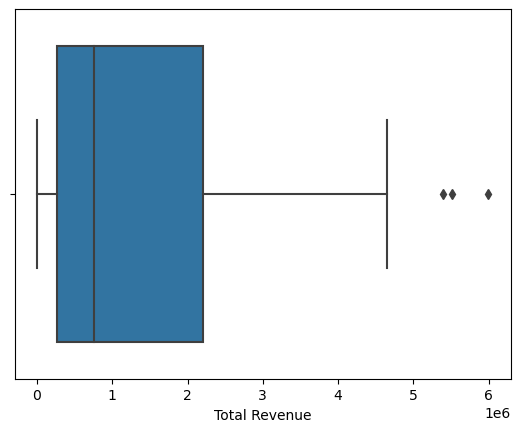

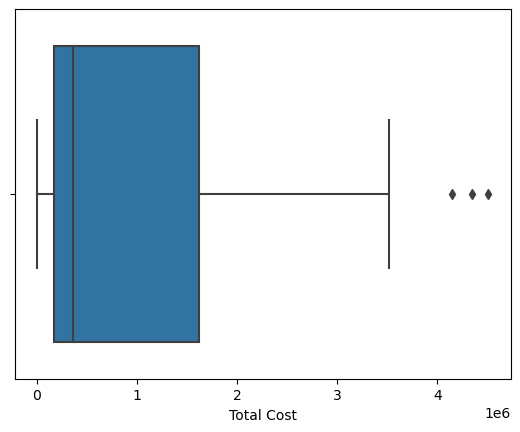

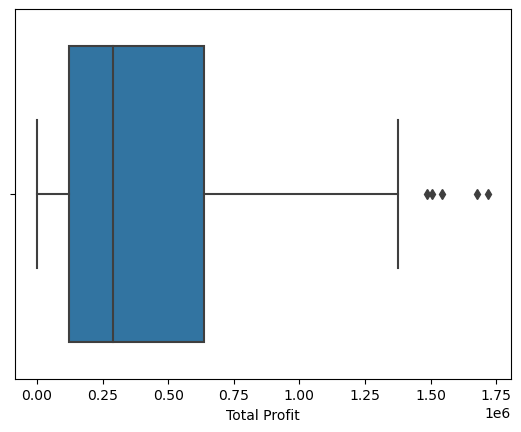

In [157]:
for col in ('Total Revenue', "Total Cost", "Total Profit"):
    sns.boxplot(x= df[col])
    plt.show()

<font color='maroon'>From the above evaluation we can see that the column "Total Revenue" has most of the values are less then 25 lakhs,
for "Total Cost" column most of the values are below 18 lakhs and for "Total Profit" column most of the values are below 10 lakhs. Also all these 3 columns have few <b>Outlier</b> values.

In [158]:
df.select_dtypes(exclude= object).columns

Index(['Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Order Year', 'Order Month'],
      dtype='object')

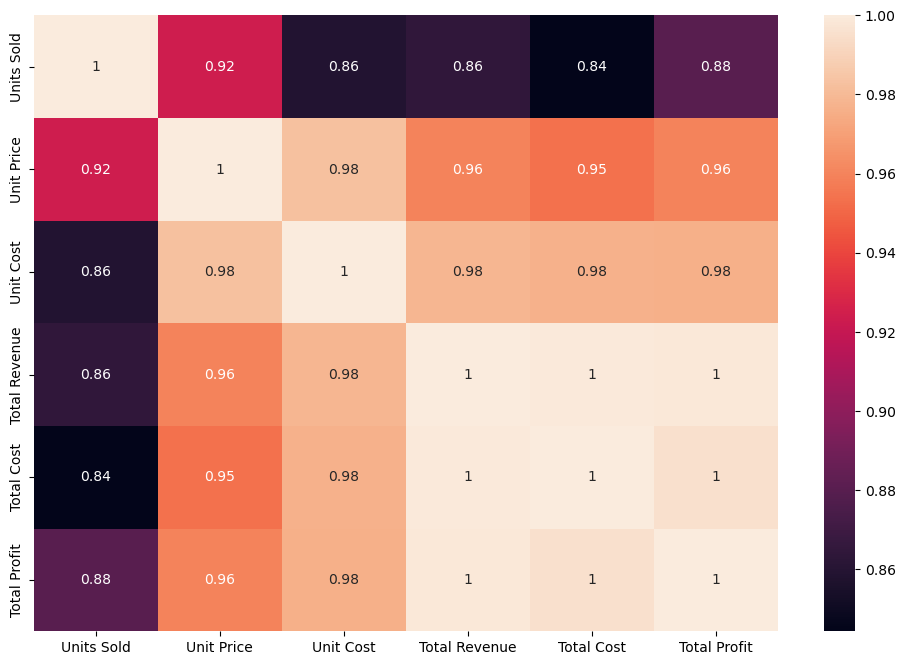

In [159]:
plt.figure(figsize=(12,8))
sns.heatmap((df.loc[:,['Units Sold', 'Unit Price','Unit Cost', 'Total Revenue', 
                       'Total Cost', 'Total Profit']]).describe().corr(), annot=True)

plt.show()

<font color='maroon'>From the above Heatmap its clear that columns "Total Revenue", "Total Cost" and "Total Profit" have perfect <b>positive correlation</b> with one another.

#### Pairplot- Helps show relationship between each pair of variables in a dataset.

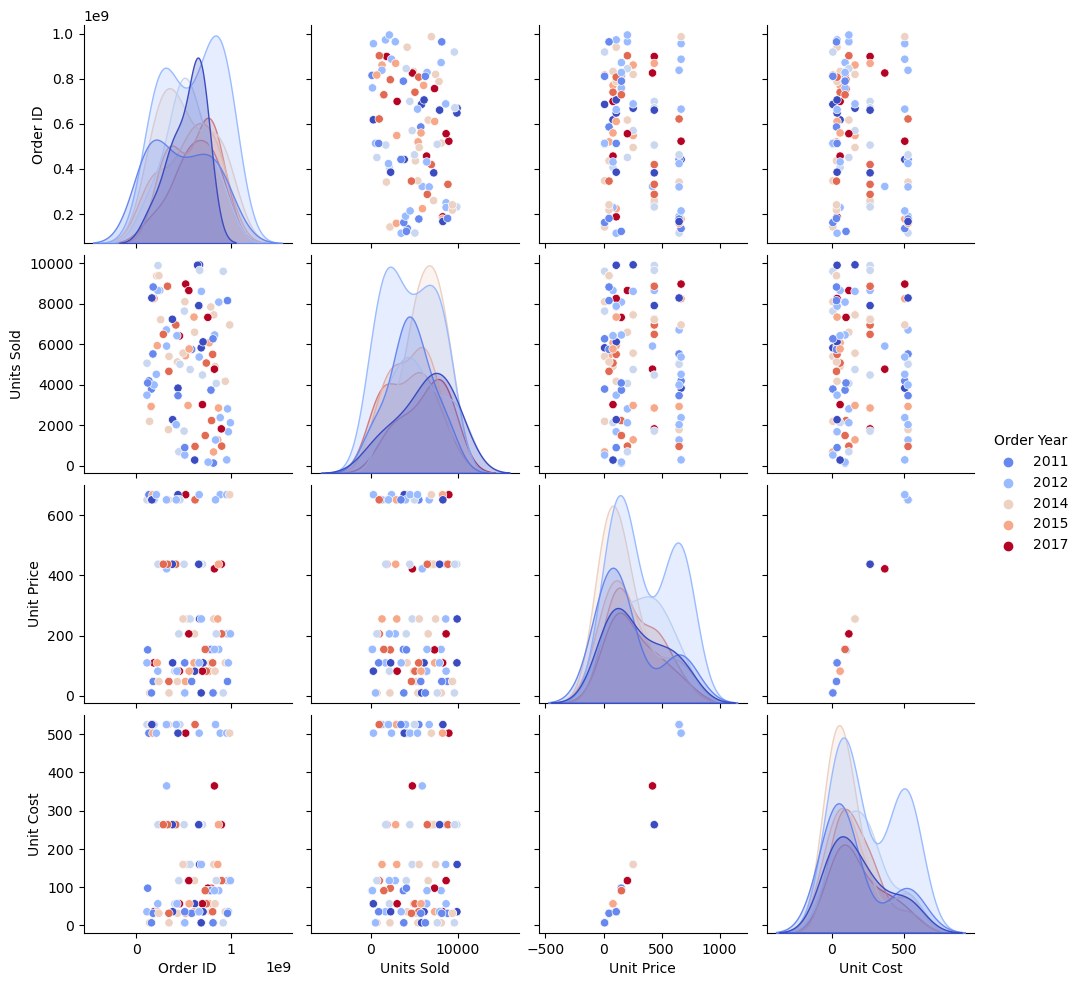

In [160]:
sns.pairplot(data=df.drop(["Total Revenue", "Total Cost", "Total Profit", "Order Month"], axis=1), 
             hue="Order Year", palette= 'coolwarm')
plt.show()
plt.close()

### Statistical summary for all Numerical Columns.

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,100.0,5.550204e+08,2.606153e+08,1.146066e+08,3.389225e+08,5.577086e+08,7.907551e+08,9.940222e+08
Units Sold,100.0,5.128710e+03,2.794485e+03,1.240000e+02,2.836250e+03,5.382500e+03,7.369000e+03,9.925000e+03
Unit Price,100.0,2.767613e+02,2.355922e+02,9.330000e+00,8.173000e+01,1.798800e+02,4.372000e+02,6.682700e+02
Unit Cost,100.0,1.910480e+02,1.882082e+02,6.920000e+00,3.584000e+01,1.072750e+02,2.633300e+02,5.249600e+02
Total Revenue,100.0,1.373488e+06,1.460029e+06,4.870260e+03,2.687212e+05,7.523144e+05,2.212045e+06,5.997055e+06
Total Cost,100.0,9.318057e+05,1.083938e+06,3.612240e+03,1.688680e+05,3.635664e+05,1.613870e+06,4.509794e+06
Total Profit,100.0,4.416820e+05,4.385379e+05,1.258020e+03,1.214436e+05,2.907680e+05,6.358288e+05,1.719922e+06
Order Year,100.0,2.013230e+03,2.088231e+00,2.010000e+03,2.012000e+03,2.013000e+03,2.015000e+03,2.017000e+03
Order Month,100.0,6.260000e+00,3.353334e+00,1.000000e+00,4.000000e+00,6.000000e+00,9.250000e+00,1.200000e+01


<font color='red'>
<b>Units Sold:</b> The average units sold per order is approximately 5128, with a minimum of 124 and a maximum of 9925.<br>
<br>
<b>Unit Price:</b> The average unit price is around 276.76 USD, with a minimum of 9.33 USD and a maximum of 668.27 USD.<br>
<br>
<b>Unit Cost:</b> The average unit cost is approximately 191.05 USD, with a minimum of 6.92 USD and a maximum of 524.96 USD.<br><br>
<b>Total Revenue:</b> The average total revenue per order is about 1,373,488 USD with a minimum of 4,870.26 USD and a maximum of 5,997,055 USD.<br><br>
<b>Total Cost:</b> The average total cost per order is around 931,805 USD, with a minimum of 3,612.24 USD and a maximum of 4,509,794 USD.<br><br>
<b>Total Profit:</b> The average total profit per order is approximately 441,682 USD, with a minimum of 1,258.02 USD and a maximum of 1,719,922 USD.<br>

<font color='maroon'>#### In our Dataset "DF" we have 'Total Revenue', 'Total Cost' and 'Total Profit' columns as Float datatype. The values in each of these columns have more than 2 decimal places which we have to limit to just 2

In [162]:
df['Total Revenue']= df['Total Revenue'].apply(lambda x: "{:.2f}".format(x)).astype(float)

In [163]:
df['Total Cost']= df['Total Cost'].apply(lambda x: "{:.2f}".format(x)).astype(float)

In [164]:
df['Total Profit']= df['Total Profit'].apply(lambda x: "{:.2f}".format(x)).astype(float)

### Frequency counts for all Categorical Columns.

In [166]:
df.nunique()

Region              7
Country            76
Item Type          12
Sales Channel       2
Order Priority      4
Order Date        100
Order ID          100
Ship Date          99
Units Sold         99
Unit Price         12
Unit Cost          12
Total Revenue     100
Total Cost        100
Total Profit      100
Order Year          8
Order Month        12
dtype: int64

In [167]:
## Listing out all the Categorical columns
cat_cols= [col for col in df.columns if df[col].dtypes==object]
print(cat_cols)

# cat_cols1 = df.select_dtypes(include= 'object').columns

['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']


<font color='red'><b>Region:</b> The dataset covers sales from various regions, with the highest number of sales from Sub-Saharan Africa (36) and the lowest from North America (3).<br><br>
<b>Country:</b> The dataset includes sales from 76 countries, with The Gambia having the highest number of entries (4).<br><br>
<b>Item Type:</b> The most frequent items sold are Clothes and Cosmetics (13 each), while the least frequent are Meat (2).<br><br>
<b>Sales Channel:</b> Sales are evenly distributed between Offline (50) and Online (50) channels.<br><br>
<b>Order Priority:</b> The most common order priority is High (H) with 30 entries, followed by Low (L), Critical (C), and Medium (M).

In [168]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Order Year', 'Order Month'],
      dtype='object')

### Bivariate Analysis
### <font color='green'>Sales Distribution across Region

In [169]:
reg_rev= df.groupby('Region')[['Total Revenue']].sum()
reg_rev

,Total Revenue
Region,
Asia,21347091.02
Australia and Oceania,14094265.13
Central America and the Caribbean,9170385.49
Europe,33368932.11
Middle East and North Africa,14052706.58
North America,5643356.55
Sub-Saharan Africa,39672031.43


In [170]:
reg_prof= df.groupby('Region')[['Total Profit']].mean()
reg_prof

,Total Profit
Region,
Asia,555804.170000
Australia and Oceania,429287.275455
Central America and the Caribbean,406701.121429
Europe,503769.937727
Middle East and North Africa,576119.186000
North America,485980.920000
Sub-Saharan Africa,338422.538889


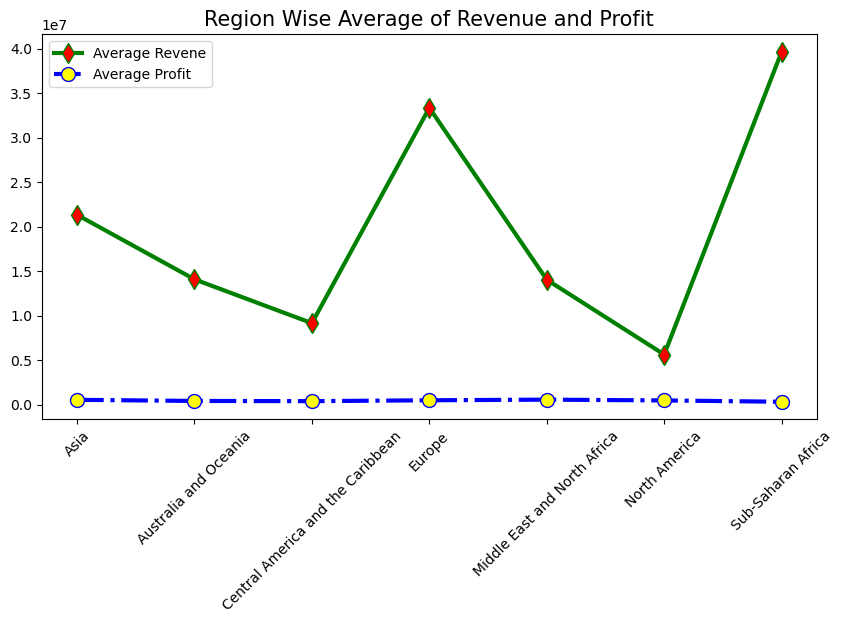

In [174]:
plt.figure(figsize=(10,5))
plt.plot(reg_rev.index, reg_rev.values, lw= 3, color='green', 
         marker= 'd', markersize=10, mfc='red', label='Average Revene')

plt.plot(reg_prof.index, reg_prof.values, ls='-.', lw= 3, color='blue', 
         marker= 'o', markersize=10, mfc='yellow', label='Average Profit')

plt.title('Region Wise Average of Revenue and Profit', fontsize=15)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [175]:
cols= df.select_dtypes(include= 'object').columns
cols

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority'], dtype='object')

In [176]:
ob_dict = {col: df[col].value_counts() for col in cols}
ob_dict

{'Region': Sub-Saharan Africa                   36
 Europe                               22
 Australia and Oceania                11
 Asia                                 11
 Middle East and North Africa         10
 Central America and the Caribbean     7
 North America                         3
 Name: Region, dtype: int64,
 'Country': The Gambia               4
 Sierra Leone             3
 Sao Tome and Principe    3
 Mexico                   3
 Australia                3
                         ..
 Comoros                  1
 Iceland                  1
 Macedonia                1
 Mauritania               1
 Mozambique               1
 Name: Country, Length: 76, dtype: int64,
 'Item Type': Clothes            13
 Cosmetics          13
 Office Supplies    12
 Fruits             10
 Personal Care      10
 Household           9
 Beverages           8
 Baby Food           7
 Cereal              7
 Vegetables          6
 Snacks              3
 Meat                2
 Name: Item Type, dtype:

In [177]:
Region_7= ob_dict['Region'].reset_index().sort_values(by='Region', ascending=False)
Region_7

,index,Region
0,Sub-Saharan Africa,36
1,Europe,22
2,Australia and Oceania,11
3,Asia,11
4,Middle East and North Africa,10
5,Central America and the Caribbean,7
6,North America,3


In [178]:
df['Sales Channel'].value_counts().reset_index()['Sales Channel']

0    50
1    50
Name: Sales Channel, dtype: int64

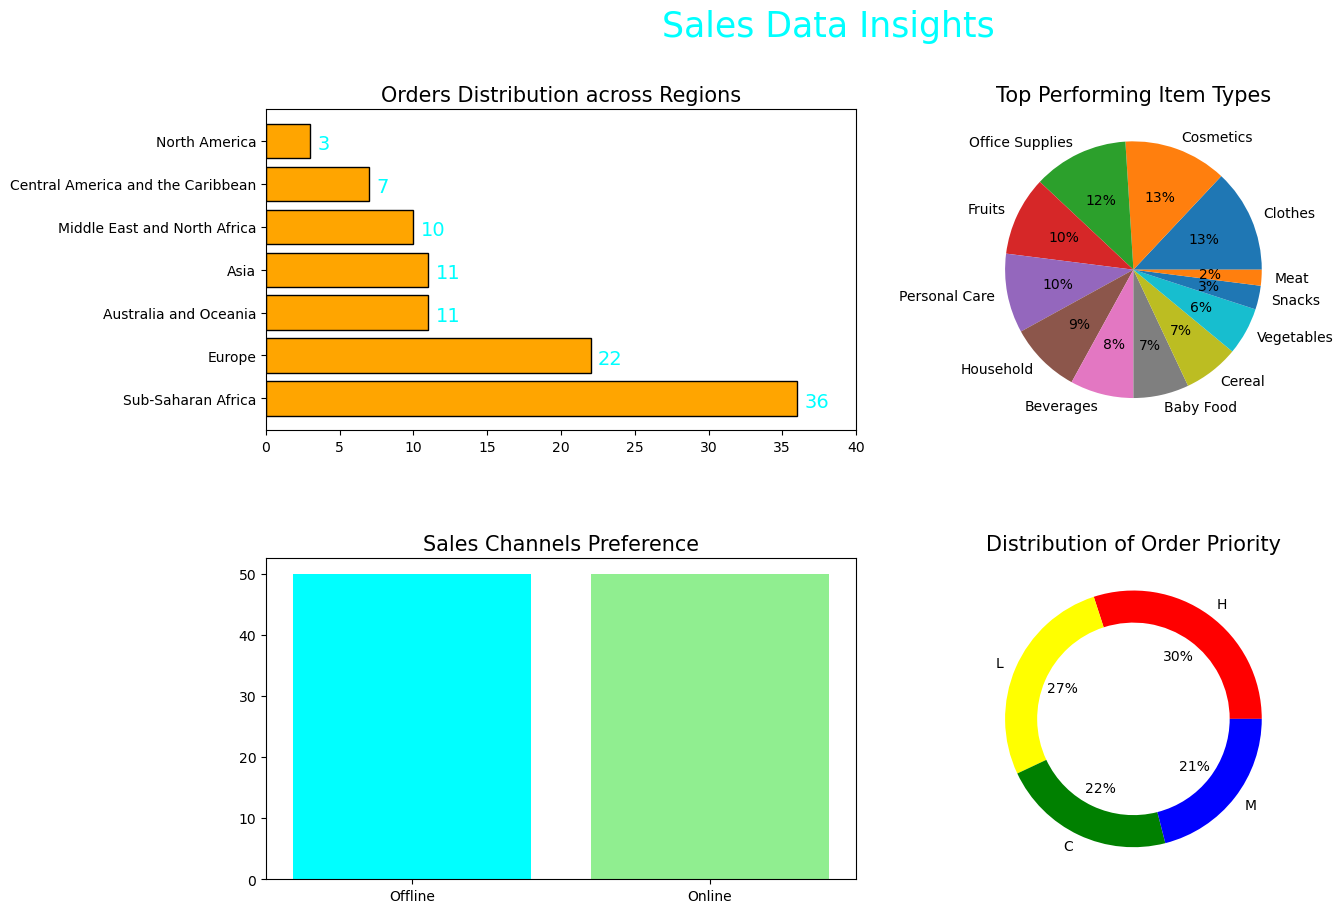

In [183]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
ax1.barh(Region_7['index'], Region_7['Region'], color='orange', edgecolor='black')
ax1.set_xlim(0,40)

for idx, value in enumerate(Region_7['Region']):
    ax1.annotate(value, xy=[value+.5 , idx-.2], fontsize=14, color='cyan')
ax1.set_title('Orders Distribution across Regions', fontsize=15)
    
ax2.pie(df['Item Type'].value_counts().values, labels = df['Item Type'].value_counts().index, autopct= "%.f%%")
ax2.set_title('Top Performing Item Types', fontsize=15)



ax3.bar(df['Sales Channel'].value_counts().index, df['Sales Channel'].value_counts().values, 
        color=['cyan', 'lightgreen'])
for indx, value in enumerate(df['Sales Channel'].value_counts().reset_index()['Sales Channel']):
    ax3.annotate(str(value), xy=[value, idx])
ax3.set_title('Sales Channels Preference', fontsize=15)



colors= ['red', 'yellow', 'green', 'blue']
ax4.pie(df['Order Priority'].value_counts().values, labels= df['Order Priority'].value_counts().index, 
        autopct="%.f%%", wedgeprops=dict(width=0.25), colors=colors)
ax4.set_title('Distribution of Order Priority', fontsize=15)


plt.subplots_adjust(hspace=0.4, wspace=-.03)
plt.suptitle("Sales Data Insights", fontsize=25, color='cyan')
plt.show()
plt.close()

### Calculating Profit Margins

In [186]:
df['Profit Margin'] = (df['Total Profit'] / df['Total Revenue']) * 100

# Analyzing profit margins across regions and item types
region_margin = df.groupby('Region')['Profit Margin'].mean().sort_values(ascending=False)
item_margin = df.groupby('Item Type')['Profit Margin'].mean().sort_values(ascending=False)
region_margin

Region
Middle East and North Africa         39.366050
Central America and the Caribbean    39.234778
Europe                               37.578526
Asia                                 36.454306
Sub-Saharan Africa                   35.090419
Australia and Oceania                34.159507
North America                        28.707909
Name: Profit Margin, dtype: float64

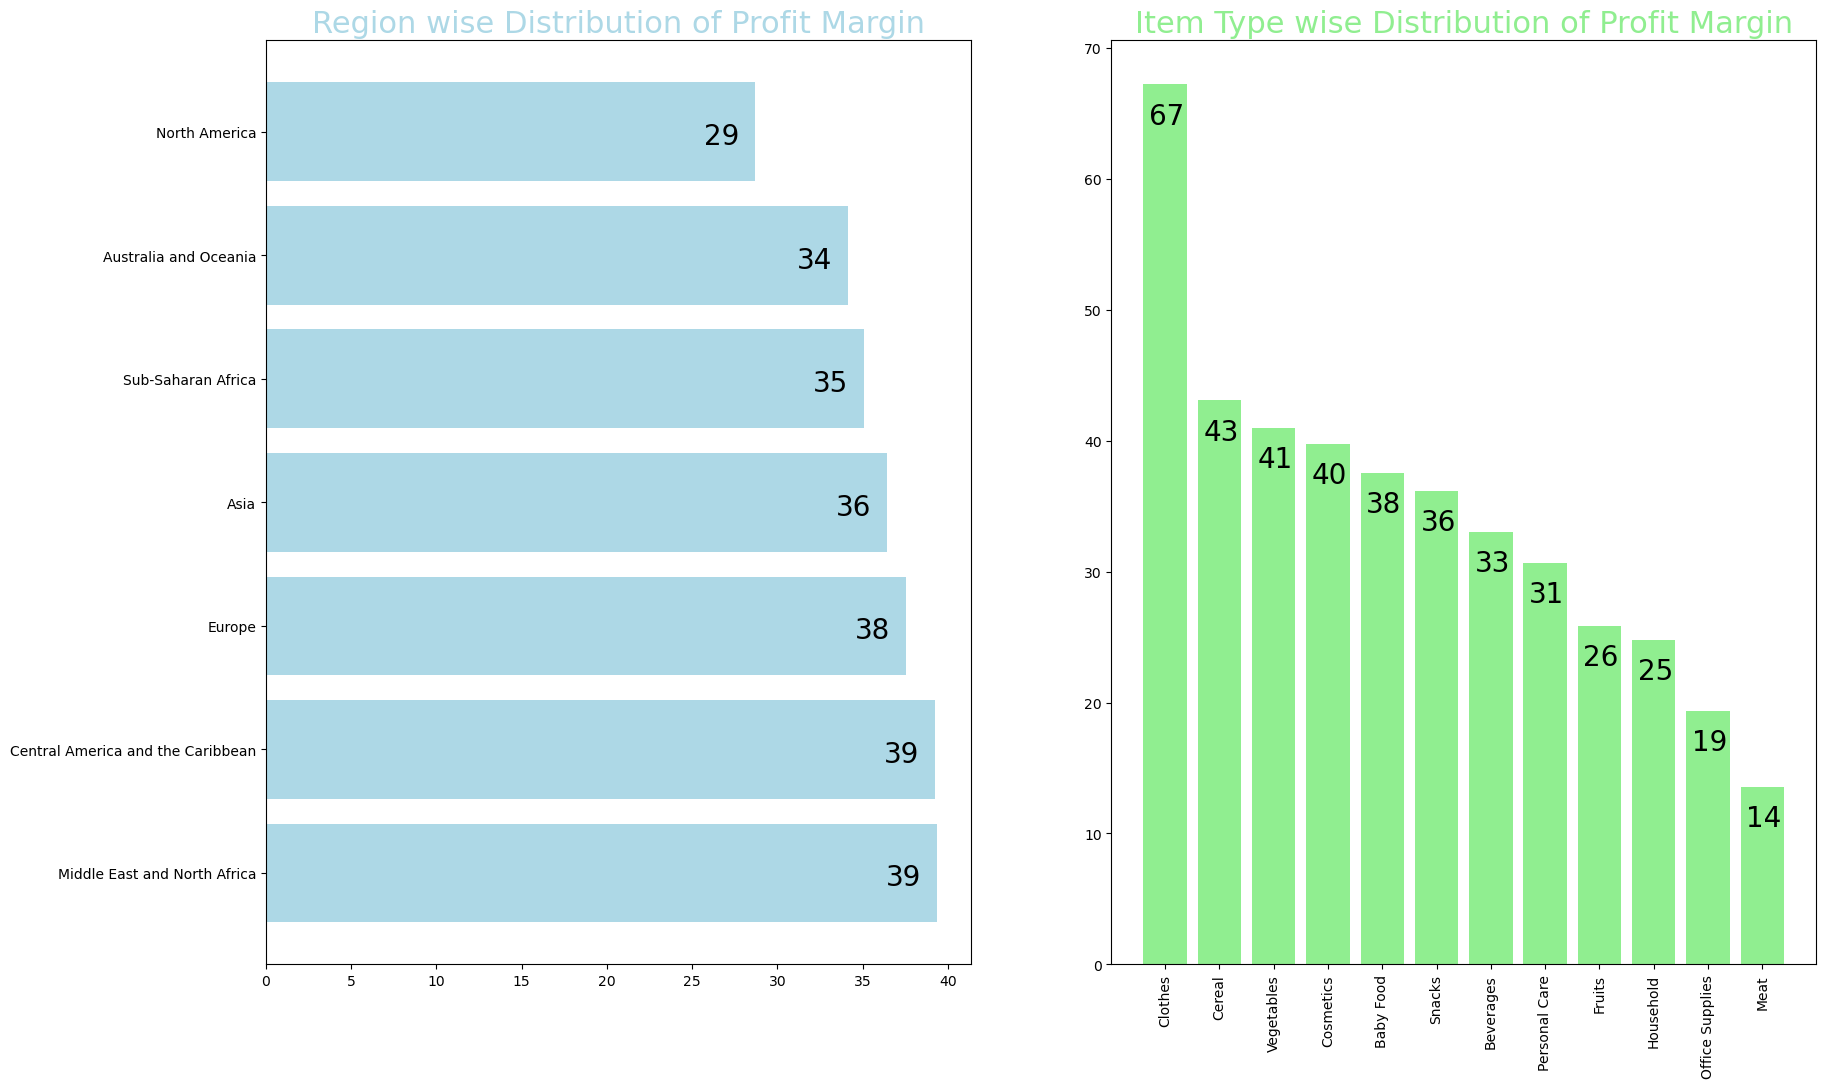

In [187]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(20, 12))
ax1.barh(region_margin.index, region_margin.values, color='lightblue')
for idx, value in enumerate(region_margin.values):
    ax1.annotate("{:.0f}".format(value), xy= (value-3, idx-.1), fontsize=20)

ax1.set_title('Region wise Distribution of Profit Margin', color='lightblue', fontsize=22)
    
ax2.bar(item_margin.index, item_margin.values, color='lightgreen')
for idx, value in enumerate(item_margin.values):
    ax2.annotate("{:.0f}".format(value), xy= (idx-.295, value-3), fontsize=20)
ax2.set_title('Item Type wise Distribution of Profit Margin', color='lightgreen', fontsize=22)
    
plt.xticks(rotation=90)
plt.show()

# 3) Visualization

In [188]:
yearly_orders= df['Order Year'].value_counts().reset_index()
yearly_orders

,index,Order Year
0,2012,22
1,2014,15
2,2013,12
3,2011,12
4,2015,11
5,2010,10
6,2016,10
7,2017,8


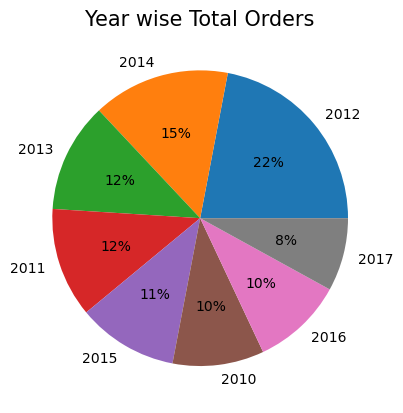

In [189]:
plt.pie(yearly_orders['Order Year'], labels= yearly_orders['index'], autopct= "%.f%%")
plt.title("Year wise Total Orders", fontsize=15)
plt.show()

In [190]:
df.groupby('Order Year')[['Total Profit', "Total Revenue", "Total Cost"]].mean()

,Total Profit,Total Revenue,Total Cost
Order Year,,,
2010,662956.743000,1.918602e+06,1.255646e+06
2011,228417.352500,9.274305e+05,6.990132e+05
2012,418773.187273,1.449938e+06,1.031165e+06
2013,559618.336667,1.694204e+06,1.134586e+06
2014,391964.112000,1.108681e+06,7.167168e+05
2015,363321.767273,1.129817e+06,7.664949e+05
2016,490383.801000,1.237287e+06,7.469029e+05
2017,511169.181250,1.671677e+06,1.160508e+06


In [191]:
yr_2010 = df[df['Order Year']==2010]
print(f"Total Count of Orders in the Year 2010 is {yr_2010.shape[0]}")

Total Count of Orders in the Year 2010 is 10


In [192]:
yr_2011 = df[df['Order Year']==2011]
print(f"Total Count of Orders in the Year 2011 is {yr_2011.shape[0]}")

Total Count of Orders in the Year 2011 is 12


In [193]:
yr_2012 = df[df['Order Year']==2012]
print(f"Total Count of Orders in the Year 2012 is {yr_2012.shape[0]}")

Total Count of Orders in the Year 2012 is 22


In [194]:
yr_2013 = df[df['Order Year']==2013]
print(f"Total Count of Orders in the Year 2013 is {yr_2013.shape[0]}")

Total Count of Orders in the Year 2013 is 12


In [195]:
yr_2014 = df[df['Order Year']==2014]
print(f"Total Count of Orders in the Year 2014 is {yr_2014.shape[0]}")

Total Count of Orders in the Year 2014 is 15


In [196]:
yr_2015 = df[df['Order Year']==2015]
print(f"Total Count of Orders in the Year 2015 is {yr_2015.shape[0]}")

Total Count of Orders in the Year 2015 is 11


In [197]:
yr_2016 = df[df['Order Year']==2016]
print(f"Total Count of Orders in the Year 2016 is {yr_2016.shape[0]}")

Total Count of Orders in the Year 2016 is 10


In [198]:
yr_2017 = df[df['Order Year']==2017]
print(f"Total Count of Orders in the Year 2017 is {yr_2017.shape[0]}")

Total Count of Orders in the Year 2017 is 8


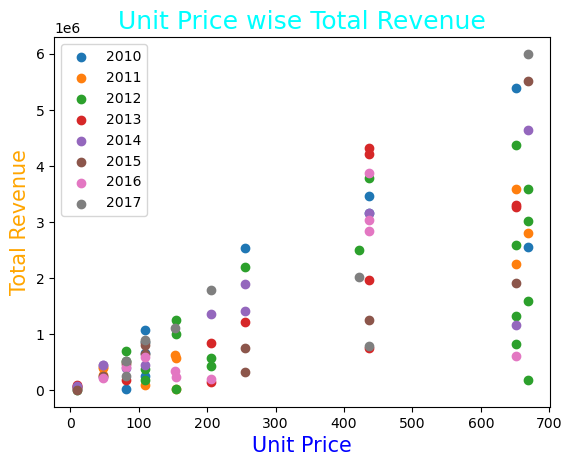

In [199]:
plt.scatter(yr_2010['Unit Price'], yr_2010['Total Revenue'], label="2010")
plt.scatter(yr_2011['Unit Price'], yr_2011['Total Revenue'], label="2011")
plt.scatter(yr_2012['Unit Price'], yr_2012['Total Revenue'], label='2012')
plt.scatter(yr_2013['Unit Price'], yr_2013['Total Revenue'], label='2013')
plt.scatter(yr_2014['Unit Price'], yr_2014['Total Revenue'], label='2014')
plt.scatter(yr_2015['Unit Price'], yr_2015['Total Revenue'], label='2015')
plt.scatter(yr_2016['Unit Price'], yr_2016['Total Revenue'], label='2016')
plt.scatter(yr_2017['Unit Price'], yr_2017['Total Revenue'], label='2017')
plt.legend()
plt.xlabel("Unit Price", fontsize=15, color='blue')
plt.ylabel("Total Revenue", fontsize=15, color='orange')
plt.title('Unit Price wise Total Revenue', fontsize=18, color='cyan')
plt.show()

From the above Scatter chart for Unit Price vs Total Revenue, we can see a **fairly positive correlation** between Price and Revenue

In [44]:
df_year= df.groupby('Order Year')['Total Profit'].mean().reset_index()
df_year

,Order Year,Total Profit
0,2010,662956.743000
1,2011,228417.352500
2,2012,418773.187273
3,2013,559618.336667
4,2014,391964.112000
5,2015,363321.767273
6,2016,490383.801000
7,2017,511169.181250


In [45]:
df_year['Total Profit'].dtypes

dtype('float64')

In [46]:
a= 100

In [47]:
print(f'value of a is {a}')

value of a is 100


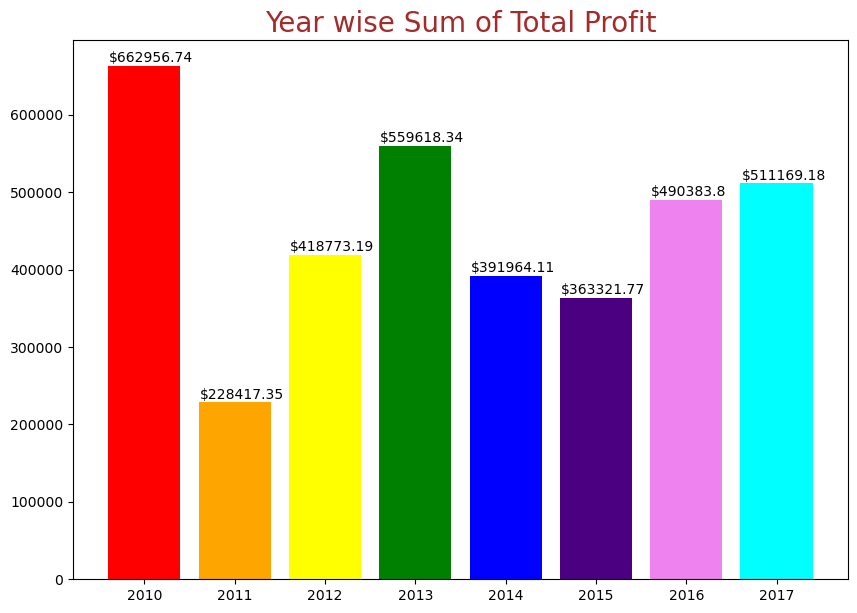

In [48]:
plt.figure(figsize=(10,7))
plt.bar(df_year['Order Year'], df_year['Total Profit'], 
        color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'cyan'])

for idx, value in enumerate(df_year['Total Profit'].values):
    plt.annotate(f'${str(round(value, 2))}', 
                xy=(df_year['Order Year'][idx]-.39, value+5000))    # Position of the annotation                
                
plt.title('Year wise Sum of Total Profit', color='brown', fontsize=20)
plt.show()

### Sales summary by Region

In [49]:
# Total Revenue, Cost, and Profit by Region
region_sales = df.groupby('Region').agg(
    Units_Sold= pd.NamedAgg(column= "Units Sold", aggfunc='sum'),
    Total_Revenue=pd.NamedAgg(column='Total Revenue', aggfunc='sum'),
    Total_Cost=pd.NamedAgg(column='Total Cost', aggfunc='sum'),
    Total_Profit=pd.NamedAgg(column='Total Profit', aggfunc='sum')
).reset_index()

region_sales

,Region,Units_Sold,Total_Revenue,Total_Cost,Total_Profit
0,Asia,59967,21347091.02,15233245.15,6113845.87
1,Australia and Oceania,68325,14094265.13,9372105.10,4722160.03
2,Central America and the Caribbean,35771,9170385.49,6323477.64,2846907.85
3,Europe,98117,33368932.11,22285993.48,11082938.63
4,Middle East and North Africa,48678,14052706.58,8291514.72,5761191.86
5,North America,19143,5643356.55,4185413.79,1457942.76
6,Sub-Saharan Africa,182870,39672031.43,27488820.03,12183211.40


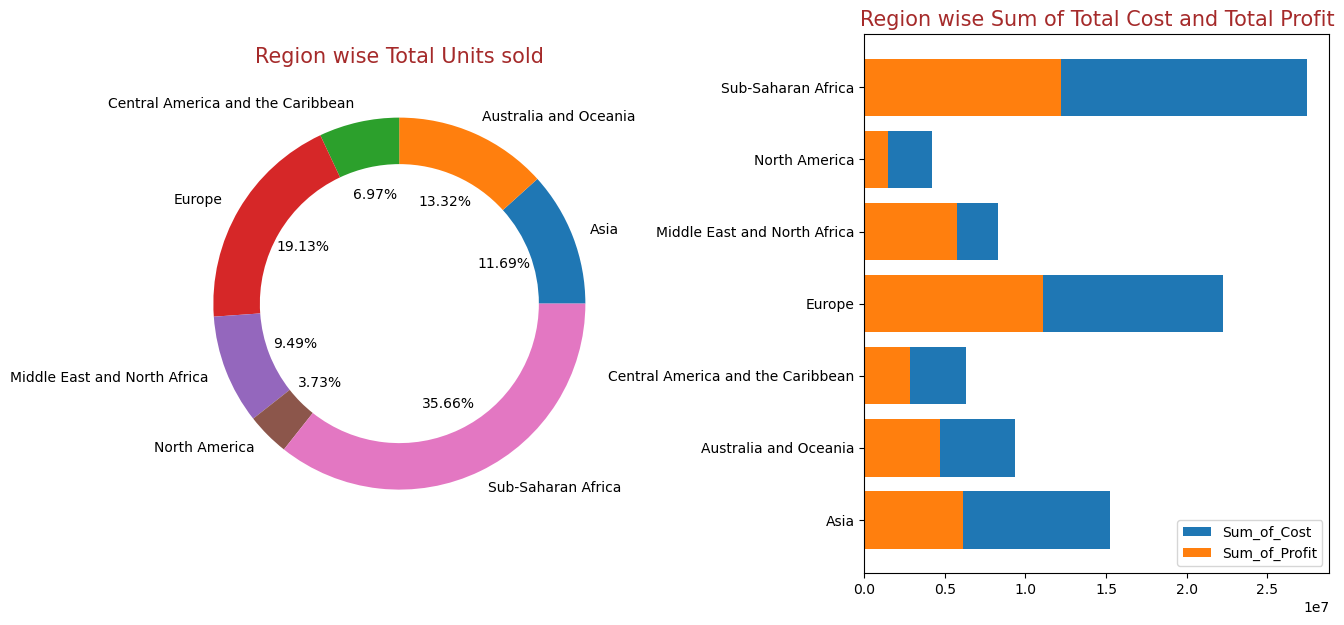

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
ax1.pie(region_sales['Units_Sold'], labels=region_sales['Region'], autopct="%.2f%%", wedgeprops= dict(width= 0.25))
ax1.set_title('Region wise Total Units sold', color='brown', fontsize=15)

ax2.barh(region_sales['Region'], region_sales['Total_Cost'], label= 'Sum_of_Cost')
ax2.barh(region_sales['Region'], region_sales['Total_Profit'], label= 'Sum_of_Profit')
ax2.legend()
ax2.set_title('Region wise Sum of Total Cost and Total Profit', color='brown', fontsize=15)

plt.subplots_adjust(wspace=.5)
plt.show()

### Sales summary by Item Type

In [51]:
# Total Units Sold, Revenue, and Profit by Item Type
item_sales = df.groupby('Item Type').agg(
    Units_Sold=pd.NamedAgg(column='Units Sold', aggfunc='sum'),
    Total_Revenue=pd.NamedAgg(column='Total Revenue', aggfunc='sum'),
    Total_Profit=pd.NamedAgg(column='Total Profit', aggfunc='sum')
).reset_index()

item_sales

,Item Type,Units_Sold,Total_Revenue,Total_Profit
0,Baby Food,40545,10350327.60,3886643.70
1,Beverages,56708,2690794.60,888047.28
2,Cereal,25877,5322898.90,2292443.43
3,Clothes,71260,7787292.80,5233334.40
4,Cosmetics,83718,36601509.60,14556048.66
5,Fruits,49998,466481.34,120495.18
6,Household,44727,29889712.29,7412605.71
7,Meat,10675,4503675.75,610610.00
8,Office Supplies,46967,30585380.07,5929583.75
9,Personal Care,48708,3980904.84,1220622.48


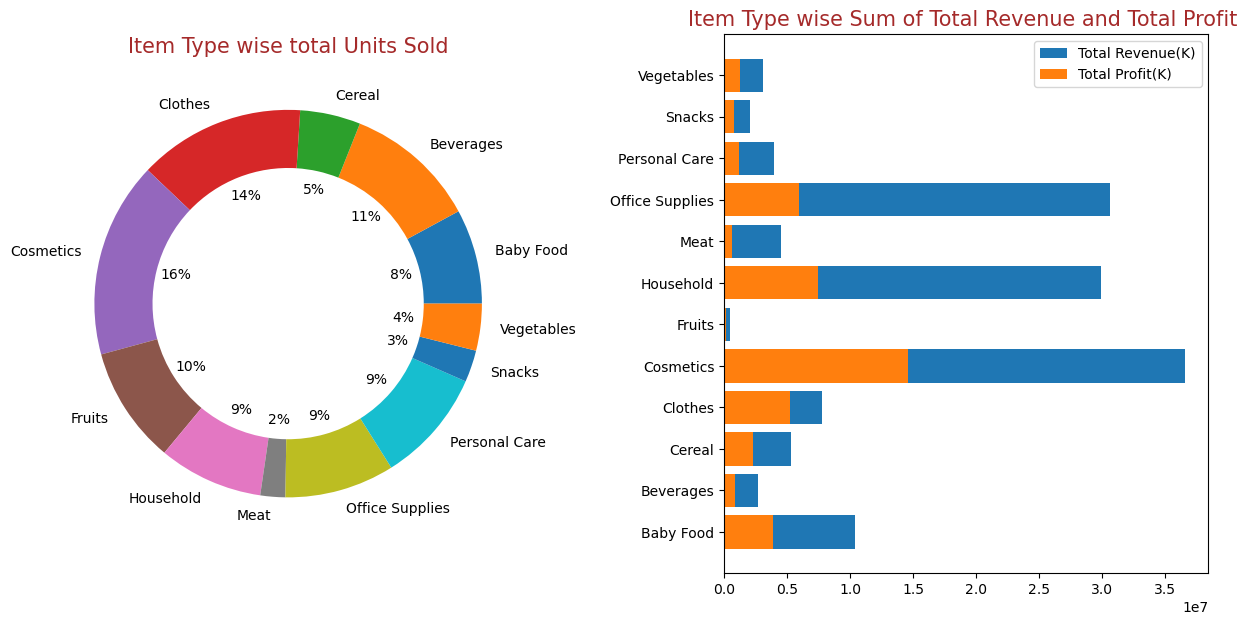

In [52]:
fig, (ax1, ax2)= plt.subplots(1,2,figsize=(15,7))

ax1.pie(x=item_sales['Units_Sold'], labels=item_sales['Item Type'], autopct= "%.f%%", wedgeprops=dict(width=0.3))
ax1.set_title("Item Type wise total Units Sold", color='brown', fontsize=15)

ax2.barh(item_sales['Item Type'], item_sales['Total_Revenue'], label= "Total Revenue(K)")
ax2.barh(item_sales['Item Type'], item_sales['Total_Profit'], label= "Total Profit(K)")
ax2.set_title("Item Type wise Sum of Total Revenue and Total Profit ", color='brown', fontsize=15)
ax2.legend()
plt.subplots_adjust(wspace=.4)
plt.show()

### Monthly Sales Performance 

In [53]:
# Total Revenue, Cost, and Profit by Month
monthly_sales = df.groupby('Order Month').agg(
    Total_Revenue=pd.NamedAgg(column='Total Revenue', aggfunc='sum'),
    Total_Cost=pd.NamedAgg(column='Total Cost', aggfunc='sum'),
    Total_Profit=pd.NamedAgg(column='Total Profit', aggfunc='sum')
).reset_index()

monthly_sales

,Order Month,Total_Revenue,Total_Cost,Total_Profit
0,1,10482467.12,7665610.10,2816857.02
1,2,24740517.77,17668467.26,7072050.51
2,3,2274823.87,1346472.81,928351.06
3,4,16187186.33,11426977.98,4760208.35
4,5,13215739.99,8633047.69,4582692.30
5,6,5230325.77,3044946.34,2185379.43
6,7,15669518.50,10091055.44,5578463.06
7,8,1128164.91,548888.24,579276.67
8,9,5314762.56,2970596.53,2344166.03
9,10,15287576.61,10780653.36,4506923.25


In [54]:
def num2month(num):
    if num==1:
        return "January"
    elif num==2:
        return "February"
    elif num==3:
        return "March"
    elif num==4:
        return "April"
    elif num==5:
        return "May"
    elif num==6:
        return "June"
    elif num==7:
        return "July"
    elif num==8:
        return "August"
    elif num==9:
        return "September"
    elif num==10:
        return "October"
    elif num==11:
        return "November"
    elif num==12:
        return "December"
    else:
        return "Select a correct format"


In [55]:
monthly_sales['Order Month']= monthly_sales['Order Month'].apply(lambda x: num2month(x))
monthly_sales

,Order Month,Total_Revenue,Total_Cost,Total_Profit
0,January,10482467.12,7665610.10,2816857.02
1,February,24740517.77,17668467.26,7072050.51
2,March,2274823.87,1346472.81,928351.06
3,April,16187186.33,11426977.98,4760208.35
4,May,13215739.99,8633047.69,4582692.30
5,June,5230325.77,3044946.34,2185379.43
6,July,15669518.50,10091055.44,5578463.06
7,August,1128164.91,548888.24,579276.67
8,September,5314762.56,2970596.53,2344166.03
9,October,15287576.61,10780653.36,4506923.25


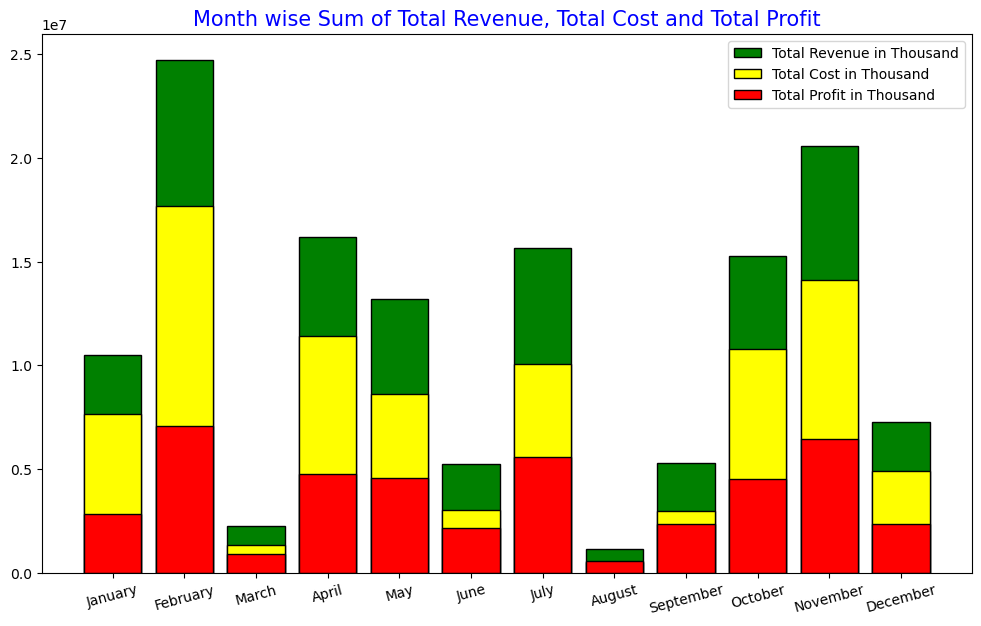

In [56]:
plt.figure(figsize=(12,7))

plt.bar(monthly_sales["Order Month"], monthly_sales['Total_Revenue'], label="Total Revenue in Thousand", 
       color= 'green', edgecolor='black')
plt.bar(monthly_sales["Order Month"], monthly_sales['Total_Cost'], label="Total Cost in Thousand",
        color= 'yellow', edgecolor='black')
plt.bar(monthly_sales["Order Month"], monthly_sales['Total_Profit'], label="Total Profit in Thousand", 
       color= 'red', edgecolor='black')


plt.title("Month wise Sum of Total Revenue, Total Cost and Total Profit", fontsize=15, color='blue')
plt.xticks(rotation=15)
plt.legend()
plt.show()

### Sales Channel Analysis

In [57]:
# Total Units Sold, Revenue, and Profit by Sales Channel
channel_sales = df.groupby('Sales Channel').agg(
    Units_Sold=pd.NamedAgg(column='Units Sold', aggfunc='sum'),
    Total_Revenue=pd.NamedAgg(column='Total Revenue', aggfunc='sum'),
    Total_Profit=pd.NamedAgg(column='Total Profit', aggfunc='sum')
).reset_index()

channel_sales

,Sales Channel,Units_Sold,Total_Revenue,Total_Profit
0,Offline,276782,79094809.20,24920726.67
1,Online,236089,58253959.11,19247471.73


### Order Priority Analysis

In [58]:
# Total Units Sold, Revenue, and Profit by Order Priority
priority_sales = df.groupby('Order Priority').agg(
    Units_Sold=pd.NamedAgg(column='Units Sold', aggfunc='sum'),
    Total_Revenue=pd.NamedAgg(column='Total Revenue', aggfunc='sum'),
    Total_Profit=pd.NamedAgg(column='Total Profit', aggfunc='sum')
).reset_index()

priority_sales

,Order Priority,Units_Sold,Total_Revenue,Total_Profit
0,C,116951,18855063.05,6748328.46
1,H,154212,48749546.05,16891599.58
2,L,146876,36628127.46,10858727.86
3,M,94832,33116031.75,9669542.50


In [59]:
df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total Revenue, dtype: float64

<font color='blue' size=4><b>The region with the highest total revenue was identified as Sub-Saharan Africa.

In [60]:
df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

<font color='blue' size=4><b>The Most Profitable Item Type was Cosmetics.

In [200]:
sc_tr= df.groupby('Sales Channel')['Total Revenue'].sum()
print(f"Online sales contributed to {round((sc_tr['Online']/ (sc_tr['Online'] + sc_tr['Offline']))*100, 2)}% of Total Revenue.")

Online sales contributed to 42.41% of Total Revenue.


In [201]:
df.groupby('Order Priority')['Profit Margin'].sum().sort_values(ascending=False)

Order Priority
H    1174.385777
L     877.255046
C     852.907106
M     716.614357
Name: Profit Margin, dtype: float64

<font color='blue' size=4><b>High-priority orders contributed significantly Higher to Total Profit.

In [202]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Order Year', 'Order Month', 'Profit Margin'],
      dtype='object')

## Saving the DataFrame to an Excel file to make a Dashboard.

In [65]:
df.to_excel("Amazon_Sales_Data.xlsx")